# Computer Vision

* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* https://www.learnpytorch.io/03_pytorch_computer_vision/


## 0. Computer Vision libraries in PyTorch

* `torchvision` https://pytorch.org/vision/stable/index.html
* `torchvision.datasets` get datasets and data loading functions for a Computer vision
* `torchvision.models` get pre-trained Computer vision models taht you leverage for your own problem
* `torchvision.transforms` functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torchvision.utils.data.Dataset` Base dataset class for PyTorch
* `torchvision.utils.data.DataLoader` Create a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)


2.4.0+cu124
0.19.0+cu124


### 1. Getting a dataset
the dataset we'll use is FashionMNIST from torchvision.datasets  https://github.com/zalandoresearch/fashion-mnist




In [2]:
# setup training data

from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to store it
    train = True, # do we want training datasets?
    download=True,
    transform=ToTensor(), # how do we want to transform the data
    target_transform= None # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check the shape of our image
print(f"Image shape: {image.shape} -> color channel, height and width")
print(f"Label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> color channel, height and width
Label: Ankle boot


### 1.2 Visualize our data

Image shape : torch.Size([1, 28, 28])


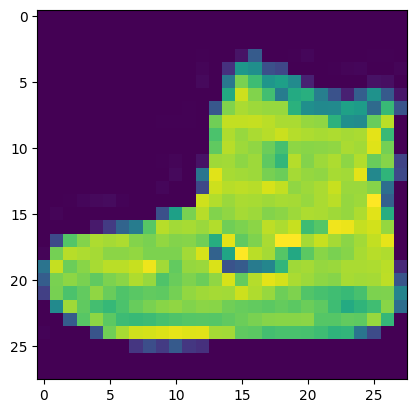

In [8]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze());

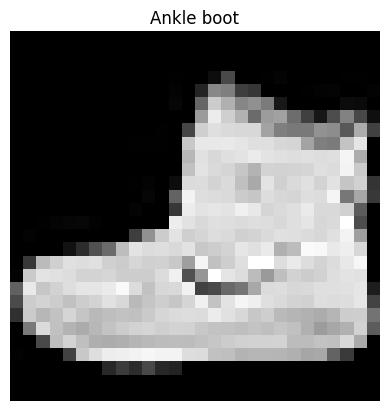

In [9]:

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

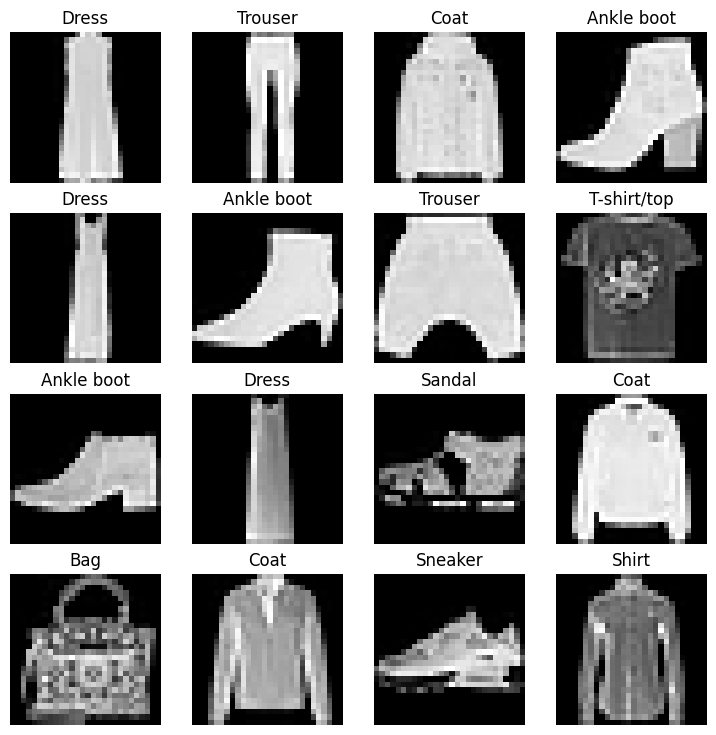

In [10]:
# Plot more images 
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
    #print(random_idx)


## 2. Prepare DataLoader
rigth now, our data in is the form of PyTorch Datasets.

DataLoader turns our datasets into a Python iterable. 

More specification, we want to turn our data into batches

why?

* It is more computer efficient, it would consume a lot of memory to run all data at once 
* It gives our NN more changes to update its gradient descent 

https://www.youtube.com/watch?v=4qJaSmvhxi8&ab_channel=DeepLearningAI

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

#
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x247bcb14d40>,
 <torch.utils.data.dataloader.DataLoader at 0x247bcd66960>)

In [12]:
# Let's check out what we've created

print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of :{BATCH_SIZE}")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of :{BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x00000247BCB14D40>, <torch.utils.data.dataloader.DataLoader object at 0x00000247BCD66960>)
Lenght of train_dataloader: 1875 batches of :32
Lenght of test_dataloader: 313 batches of :32


In [13]:
# Check out what's inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

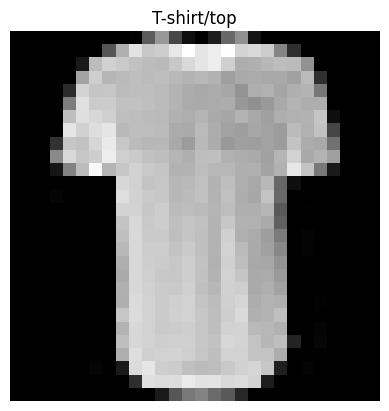

In [14]:
# Show a sample
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)


## 3. Model 0: Build a baseline model

when starting a build a series of machine learning modeling, it's best to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiment

in other words: start simply and add complexity when necessary

In [15]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(x.shape)

# Flatten the sample
output = flatten_model(x) # perform forward pass
print("Shape after flattening")
print(output.shape)

torch.Size([1, 28, 28])
Shape after flattening
torch.Size([1, 784])


In [16]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                    input_shape: int,
                    hidden_units: int,
                    output_shape: int) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                       out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)




In [17]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape= 28 * 28,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1,1,28, 28])
print(dummy_x.shape)
dummy_x

torch.Size([1, 1, 28, 28])


tensor([[[[0.0851, 0.8142, 0.2461, 0.7762, 0.4256, 0.2940, 0.8762, 0.4034,
           0.2302, 0.4234, 0.1820, 0.0186, 0.4124, 0.4718, 0.2150, 0.9432,
           0.3883, 0.3730, 0.8962, 0.5556, 0.3824, 0.6150, 0.0482, 0.9916,
           0.6319, 0.6758, 0.1312, 0.8823],
          [0.0891, 0.3263, 0.1794, 0.2475, 0.6067, 0.0041, 0.0105, 0.6142,
           0.6648, 0.5072, 0.3100, 0.3601, 0.4309, 0.3986, 0.1907, 0.8764,
           0.6012, 0.1655, 0.3984, 0.1382, 0.2079, 0.8798, 0.6526, 0.7190,
           0.4351, 0.3752, 0.5646, 0.1448],
          [0.0025, 0.8515, 0.5102, 0.8033, 0.8762, 0.7187, 0.3291, 0.4083,
           0.4739, 0.5299, 0.5194, 0.1091, 0.2251, 0.8644, 0.5160, 0.2733,
           0.8380, 0.3516, 0.2966, 0.8494, 0.1055, 0.2605, 0.8784, 0.4511,
           0.2938, 0.9149, 0.5761, 0.0302],
          [0.1303, 0.3732, 0.4726, 0.1235, 0.3116, 0.6690, 0.0337, 0.0314,
           0.6300, 0.5954, 0.0171, 0.0348, 0.9154, 0.9990, 0.2815, 0.9981,
           0.8453, 0.9444, 0.2848, 0.3776, 

In [19]:
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* loss function : `nn.CrossEntropyLoss()`
* optimizer - our optimizer `torch.optim.SGD`
* Evaluate metric: for classification let's use accuracy

In [21]:
# Import accuracy metric

from helper_functions import accuracy_fn

# Setup loss function

loss_fn = nn.CrossEntropyLoss()

# Setup optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments 

Machine learning is very experimental.

Two main things you'll often want to track:
* Model's performance
* How fast it runs

In [22]:
from timeit import default_timer as timer 
def print_train_time(start:float,
                     end:float,
                     device: torch.device = None):
    """Print difference betweem start and end time."""
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [23]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.7899999992087032e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through test batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time it all 

In [24]:
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()
# Set the number of epochs (we'll keep this small for faster training time)

epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches 
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred =  model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero glad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples.")

    # Divide total train loss by lenght of dataloader as the accumulated loss is very high, we need an average instead
    train_loss /= len(train_dataloader)

    # Testing

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. forward pass
            test_pred = model_0(X_test)

            # 2. test loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. test accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the accuracy per batch
        test_acc /= len(test_dataloader)
    
    # Print out what's happening 

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
tota_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.5904 | Test loss: 0.5095 | Test accuracy: 82.0387
Epoch: 1
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.4763 | Test loss: 0.4799 | Test accuracy: 83.1969
Epoch: 2
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.4550 | Test loss: 0.4766 | Test accuracy: 83.4265
Train time on cpu: 25.582 seconds


### 4. Make predictions and get Model 0 results

In [25]:
device = 'cpu'

In [26]:
import torch.utils


torch.manual_seed(42)

def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device):
    """Returns a dictionary containing the results of model predictions on data_loader."""

    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred = y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc":acc}
# calculate model_0 results on test data

model_0_results = eval_mode(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [28]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int, 
                hidden_units: int,
                output_shape: int ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x):
        return self.layer_stack(x)



In [29]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

In [31]:
train_dataloader


In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# epochs 
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        # send content to device
        X, y = X.to(device), y.to(device)

        # Train the model
        model_1.train()
        
        # 1. Forward pass
        y_pred = model_1(X)

        # 2. calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward 
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        if batch % 400 ==0:
            print(f"Looked at {batch* len(X)} / {len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader.dataset)
    # TESTING 
    model_1.eval()
    with torch.inference_mode():
        test_loss = 0
        test_acc = 0
        for X_test, y_test in test_dataloader:
            X_test, y_test  =  X_test.to(device), y_test.to(device)
            # 1. predict
            y_preds = model_1(X_test)

            #2. calculate loss and accuracy
            test_loss += loss_fn(y_preds, y_test)
            test_acc  += accuracy_fn(y_true=y_test,
                                        y_pred=y_preds.argmax(dim=1))
        test_acc /= len(test_dataloader)
        test_loss/= len(test_dataloader)
    print(f"Test loss :{train_loss:.4f} | Train loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")
            




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Test loss :0.0341 | Train loss: 0.9564 | Test accuracy: 64.9960
Epoch: 1
------------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Test loss :0.0244 | Train loss: 0.7223 | Test accuracy: 73.9117
Epoch: 2
------------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Test loss :0.0209 | Train loss: 0.6850 | Test accuracy: 75.0200


In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches 
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        
        model_1.train()

        # 1. Forward pass
        y_pred =  model_1(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero glad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples.")

    # Divide total train loss by lenght of dataloader as the accumulated loss is very high, we need an average instead
    train_loss /= len(train_dataloader)

    # Testing

    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test  =  X_test.to(device), y_test.to(device)
            # 1. forward pass
            test_pred = model_1(X_test)

            # 2. test loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. test accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the accuracy per batch
        test_acc /= len(test_dataloader)
    
    # Print out what's happening 

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.6452 | Test loss: 0.6891 | Test accuracy: 75.0300
Epoch: 1
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.6275 | Test loss: 0.6675 | Test accuracy: 75.8187
Epoch: 2
------
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train loss: 0.6156 | Test loss: 0.6459 | Test accuracy: 76.3578


### 6.2 Functionizing traing and evaulation/testing loops

let's create for:

* training loop - train_step()
* testing loop  - test_step()

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with model trying to learn on data_loader."""

    train_loss, train_acc = 0, 0
    # Put model in training model
    model.train()

    # Add a loop to loop through the training batches 
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred =  model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc  += accuracy_fn(y_true = y,
                                  y_pred = y_pred.argmax(dim=1))
        
        # 3. Optimizer zero glad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    # Calculate the average
    train_acc /= len(data_loader)
    train_loss/= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc}%")
    

In [35]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=  device):
    test_loss, test_acc = 0, 0

    # Put model in evaluation mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the device
            X, y = X.to(device), y.to(device)

            # 1. forward pass
            test_pred = model(X)
            
            # Loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc  += accuracy_fn(y_true=y,
                                     y_pred = test_pred.argmax(dim=1))
        
        # calculate the average
        test_loss /= len(data_loader)
        test_acc  /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    train_step(model =model_1,
               data_loader = train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader= test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)
train_time_end_on_gpu = timer()

tota_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                 end=train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 1.09199 | Train acc: 61.343333333333334%
Test loss: 0.95636 | Test acc: 65.00%
Train loss: 0.78101 | Train acc: 71.92833333333333%
Test loss: 0.72227 | Test acc: 73.91%
Train loss: 0.67027 | Train acc: 75.93666666666667%
Test loss: 0.68500 | Test acc: 75.02%
Train time on None: 30.461 seconds


In [38]:
!nvidia-smi

Thu Sep  5 17:16:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   48C    P5             18W /  235W |    1447MiB /   8192MiB |     29%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [39]:
tota_train_time_model_0

25.581753899999995

In the above example, cpu was faster than GPU
This happens maining because of overhead... like time spent copy data back and forth. 


https://horace.io/brrr_intro.html

In [40]:
# model_1 results dictionary

model_1_results = eval_mode(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [41]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network

CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data

To find out what's happening inside a CNN, see this website 
https://poloclub.github.io/cnn-explainer/

In [50]:
# Create a convolutional neural netword

class FashionMNISTModelV2(nn.Module):
    """ 
    Model architecture that replicates the Tiny VGG
    Model from CNN explainer website
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        #  https://poloclub.github.io/cnn-explainer/
        # hyper parameters go to https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        self.conv_block1 = nn.Sequential(
                  nn.Conv2d(in_channels=input_shape,
                            out_channels=hidden_units,
                            kernel_size= 3,
                            stride=1,
                            padding=1),
                  nn.ReLU(),
                  nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
                  nn.ReLU(),
                  nn.MaxPool2d(kernel_size=2)     
        )
        self.conv_block2 = nn.Sequential( 
                    nn.Conv2d( in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=hidden_units,
                              out_channels=hidden_units,
                              kernel_size=3,
                              stride=1,
                              padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2)

        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=int(hidden_units * 7 * 7), # there is a trick to calculate this  # I multiplied by 4.9 in the test example
                      out_features= output_shape
                      )
        )
    def forward(self, x):
        x = self.conv_block1(x)
        #print(f"Conv block 1 shape: {x.shape}")
        x = self.conv_block2(x)
        #print(f"Conv block 2 shape: {x.shape}")

        x = self.classifier(x)
        #print(f"Classify shape:{x.shape}")
        return x


In [47]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=49, out_features=10, bias=True)
  )
)

In [48]:
image = image.to(device)

In [49]:
model_2(image)

tensor([[ 0.0938,  0.0141, -0.1454, -0.0208, -0.0126, -0.0762, -0.0646, -0.0737,
          0.1218, -0.1542],
        [ 0.0720,  0.0212, -0.1389, -0.0252, -0.0388, -0.0610, -0.0792, -0.1159,
          0.1407, -0.1305],
        [ 0.1180,  0.0315, -0.1696, -0.0238, -0.0139, -0.0808, -0.0720, -0.0466,
          0.1054, -0.1591],
        [ 0.1036,  0.0186, -0.1555, -0.0254, -0.0158, -0.0776, -0.0697, -0.0756,
          0.1166, -0.1507],
        [ 0.0720,  0.0212, -0.1389, -0.0252, -0.0388, -0.0610, -0.0792, -0.1159,
          0.1407, -0.1305],
        [ 0.0726,  0.0195, -0.1369, -0.0267, -0.0375, -0.0624, -0.0757, -0.1169,
          0.1422, -0.1296],
        [ 0.0712,  0.0124, -0.1344, -0.0157, -0.0340, -0.0626, -0.0749, -0.1107,
          0.1360, -0.1398],
        [ 0.0882,  0.0309, -0.1574, -0.0230, -0.0254, -0.0681, -0.0740, -0.0906,
          0.1253, -0.1411],
        [ 0.1150,  0.0041, -0.1523, -0.0086, -0.0083, -0.1009, -0.0394, -0.0523,
          0.0983, -0.1683],
        [ 0.0720,  

### 7.1 Stepping through `nn.Conv2d` 

here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [51]:
torch.manual_seed(42)

# create  a batch of images

images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0

In [52]:
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-3.3371e-01, -3.3281e-01, -5.0839e-01,  ..., -2.3694e-01,
          -2.8108e-01, -3.1808e-01],
         [-3.3042e-01, -4.4324e-01, -4.2661e-01,  ..., -4.0290e-01,
          -2.5801e-01, -3.9595e-01],
         [-5.5964e-02, -5.1716e-01, -6.2803e-01,  ..., -2.6973e-01,
          -3.3916e-01, -3.8857e-01],
         ...,
         [-2.7309e-02, -3.8492e-01, -4.6536e-01,  ..., -4.6891e-01,
          -4.6570e-01, -2.2956e-01],
         [-1.9740e-01, -5.4037e-01, -1.7201e-01,  ..., -5.2281e-01,
          -5.0674e-01, -2.9564e-01],
         [-2.5090e-01, -5.9542e-01, -6.7210e-01,  ..., -5.3584e-01,
          -3.1367e-01, -2.2348e-01]],

        [[ 3.9225e-01,  2.5645e-01, -3.9996e-04,  ...,  3.4384e-02,
           3.2497e-01, -2.5311e-01],
         [ 2.9956e-01, -5.3156e-01, -1.8046e-01,  ...,  1.7471e-01,
          -1.2710e-01, -5.2937e-01],
         [-1.2867e-03, -1.5943e-02, -2.4883e-01,  ..., -2.7878e-01,
          -3.0863e-01, -4.3687e-01],
         ...,
         [ 6.4779e-02,  1

In [53]:
conv_output.shape, test_image.shape

(torch.Size([10, 64, 64]), torch.Size([3, 64, 64]))

### 7.2 Stepping through `nn.MaxPool2d`

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [54]:
test_image.shape

torch.Size([3, 64, 64])

In [55]:
# Print out original image shape without unsqueezed dimension

print(f"Test image shape :{test_image.shape}")
print(f"Test image unsqueezed shape: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d(kernel_size = 2)
#
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer

test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv layer: {test_image_through_conv.shape}")

# Pass through max pool layer
test_image_through_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_maxpool.shape}")

Test image shape :torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Shape after going through conv layer: torch.Size([10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 32, 32])


In [56]:
torch.manual_seed(42)

# create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(1,1,2,2)
print(f"\nRandom tensor:\n{random_tensor}\nRandom tensor shape {random_tensor.shape}")
# create max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max Pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor:\n{max_pool_tensor}\nMax Poll shape {max_pool_tensor.shape}")



Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape torch.Size([1, 1, 2, 2])
Max pool tensor:
tensor([[[[0.3367]]]])
Max Poll shape torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2

In [57]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing model_2 using our training and test functions

In [58]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time

from timeit import default_timer as timer 
train_time_start_model2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}-----------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_model2 = timer()
tota_train_time_model_2 = print_train_time(train_time_start_model2, train_time_end_model2)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0-----------
Train loss: 0.59615 | Train acc: 78.415%
Test loss: 0.40049 | Test acc: 85.70%
Epoch: 1-----------
Train loss: 0.36340 | Train acc: 86.85666666666667%
Test loss: 0.36013 | Test acc: 86.46%
Epoch: 2-----------
Train loss: 0.32694 | Train acc: 88.16%
Test loss: 0.33332 | Test acc: 87.69%
Train time on None: 35.201 seconds


In [59]:
# Model 2 results 
model2_results = eval_mode(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33331578969955444,
 'model_acc': 87.689696485623}

In [60]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 8. Compare model results and training time

In [61]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, 
                               model_1_results,
                               model2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.333316,87.689696


In [62]:
# Add training time to results comparison
compare_results['training_time'] = [tota_train_time_model_0, tota_train_time_model_1, tota_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,25.581754
1,FashionMNISTModelV1,0.685001,75.019968,30.461187
2,FashionMNISTModelV2,0.333316,87.689696,35.201265


Text(0, 0.5, 'model')

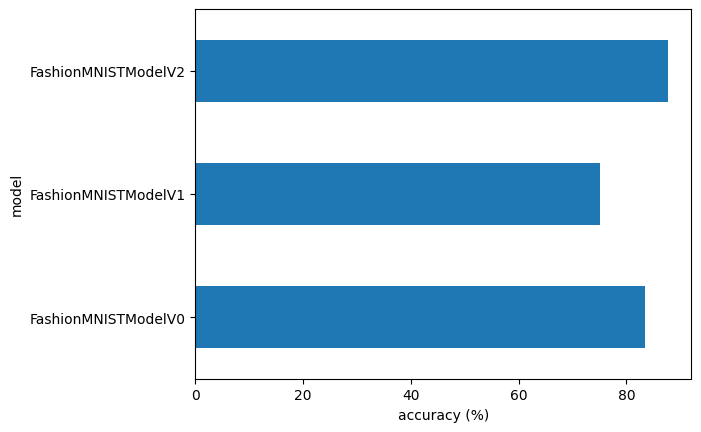

In [63]:
# Visualize our model results 

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

### 9. Make and evaluate random predictions with best model

In [64]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model output vs raw logits)
            pred_logit = model(sample)

            # Get prediction probabilities (logit -> prediction probabilities)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)


In [65]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [72]:
test_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [73]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [83]:
import random
#random.seed(42)

test_samples = []
test_labels  = []

for sample, label in random.sample(list(test_data), k=9): # here 9 is selected because we want to make a 3 by  3 plot later
    test_samples.append(sample)
    test_labels.append(label)


# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

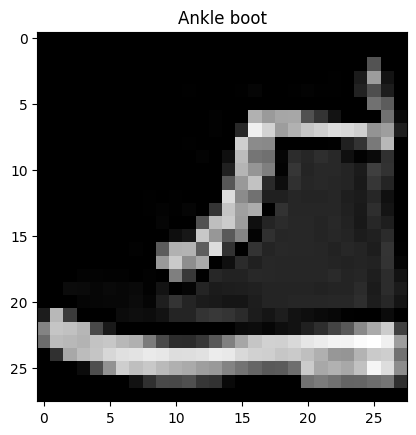

In [84]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])


In [86]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data=test_samples)
# View first two prediction probabilities 
pred_probs[:2]

tensor([[1.7337e-05, 4.7641e-06, 2.1446e-05, 2.0152e-04, 4.0533e-05, 1.7768e-02,
         9.9789e-06, 6.8519e-03, 1.6675e-02, 9.5841e-01],
        [1.4596e-05, 1.0573e-06, 1.2260e-05, 2.0028e-06, 2.1392e-06, 6.1286e-04,
         4.3045e-07, 9.8098e-01, 3.8344e-04, 1.7987e-02]])

In [78]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [87]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

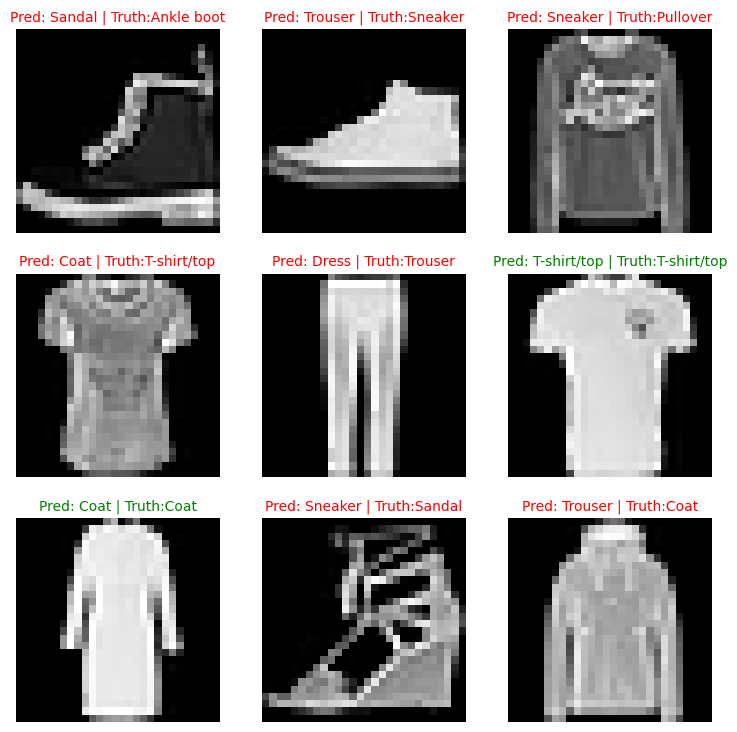

In [88]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form : eg "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth:{truth_label}"

    # check for equality between pred and truth and change color of title text

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis("off")


### 10. Making a confusion matrix for further prediction evaluation

a confusion matric is a fantastic way of evaluating your classifications labels visualy

1. Make predictions with our trained model on the test dataset 
2. Make a connfusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix with 'mlxtend' https://rasbt.github.io/mlxtend/

In [92]:
import mlxtend
from tqdm.auto import tqdm

# 1. Make prediction with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # send the data and target to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put predictions of CPU
        y_preds.append(y_pred.cpu())
    # Concatenate list of prediction into tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds) # concatenate
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [90]:
mlxtend.__version__

'0.23.1'

In [93]:
len(y_pred_tensor)

10000

In [94]:
# See if required packages are already installed
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]>=19), "mlxtend version should be able 0.19"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend


mlxtend version: 0.23.1


In [97]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets 

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

confmat_tensor

tensor([[661,   7,  44,  87,  12,   0, 181,   0,   8,   0],
        [  6, 879,   8,  86,  16,   0,   3,   0,   2,   0],
        [  9,   3, 808,  14,  89,   0,  75,   0,   2,   0],
        [ 28,  11,  24, 887,  22,   0,  25,   0,   1,   2],
        [  9,   5, 125,  66, 694,   0,  98,   0,   3,   0],
        [  7,   2,   8,   9,   0, 803,   4,  52,  95,  20],
        [ 84,   5, 127,  77,  75,   0, 622,   0,  10,   0],
        [  1,   1,   0,   0,   0,  26,   0, 880,  17,  75],
        [ 12,   2,  26,  12,   8,   5,  44,   6, 885,   0],
        [  0,   1,   0,   4,   0,  21,   3,  75,  12, 884]])

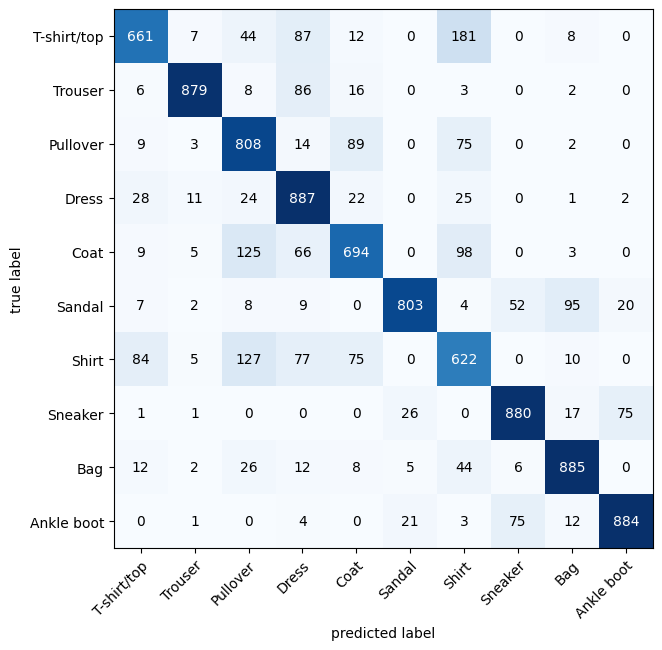

In [99]:
# 3. Plot the confusion matrix

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # mlxtend use matplotlib and this works with numpy
    class_names = class_names,
    figsize = (10, 7)
)

## 11. Save and load our model